In [10]:
install.packages('kBET.zip', repos = NULL, type = 'source')

Installing package into ‘/home/xieyufeng/R/x86_64-redhat-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message in install.packages("kBET.zip", repos = NULL, type = "source"):
“installation of package ‘kBET.zip’ had non-zero exit status”

In [11]:
library('kBET')

# demo

In [3]:
batch <- rep(seq_len(10),each=20)

In [4]:
batch

[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
 [51]  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [76]  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
[101]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
[126]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8
[151]  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
[176]  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [5]:
data <- matrix(rpois(n = 50000, lambda = 10)*rbinom(50000,1,prob=0.5), ncol=200)


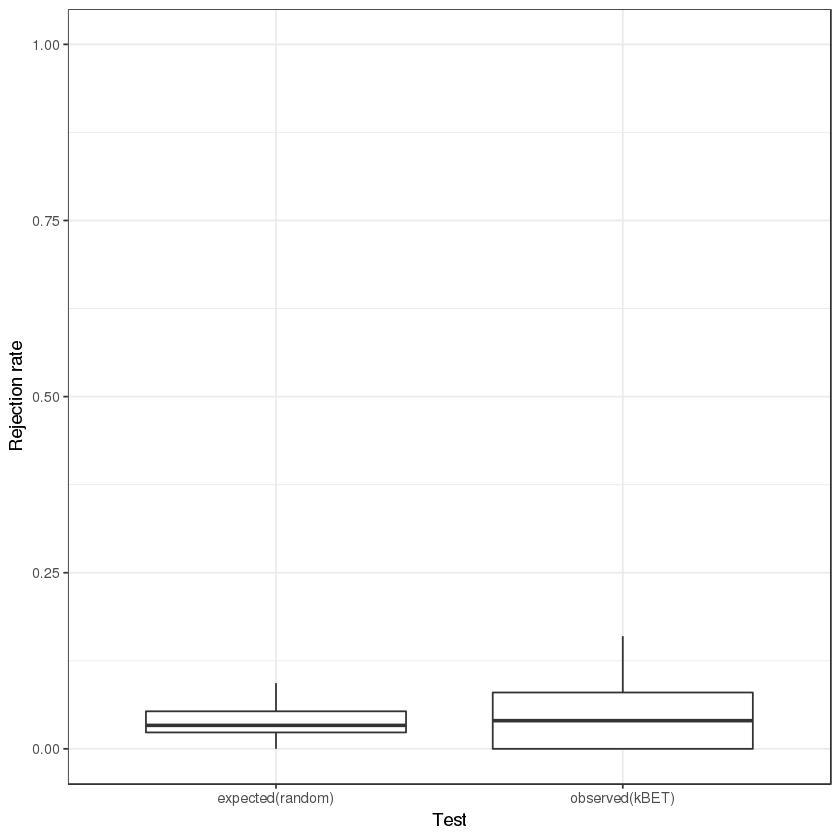

In [12]:
batch.estimate <- kBET(data,batch)

In [141]:
batch.estimate

$summary
      kBET.expected kBET.observed  kBET.signif
mean     0.01600000        0.0448 4.664145e-01
2.5%     0.00000000        0.0000 1.096307e-06
50%      0.01333333        0.0400 4.237108e-01
97.5%    0.05333333        0.1410 1.000000e+00

$results
    tested kBET.pvalue.test kBET.pvalue.null
1        1       0.77276028        0.7660054
2        1       0.63711941        0.4900395
3        1       0.77276028        0.7207918
4        1       0.50093445        0.4444057
5        1       0.88813659        0.5350143
6        1       0.63711941        0.4444057
7        1       0.13468639        0.4242467
8        1       0.88813659        0.7207918
9        1       0.63711941        0.3470376
10       1       0.88813659        0.5148554
11       1       0.77276028        0.5463294
12       1       0.77276028        0.3811795
13       1       0.37813806        0.4242467
14       1       0.37813806        0.7275467
15       1       0.19516313        0.4303221
16       1       0.8881365

In [43]:
batch.shuff <- replicate(3, batch[sample.int(length(batch))])
batch.shuff

8,5,9
7,5,5
6,4,2
1,6,5
5,1,4
6,2,10
5,3,9
3,6,10
3,5,6
3,10,7
5,5,9


In [44]:
class.frequency <- data.frame(class = names(frequencies),
                                freq = as.numeric(frequencies))

In [49]:
class.frequency

class,freq
1,0.1
2,0.1
3,0.1
4,0.1
5,0.1
6,0.1
7,0.1
8,0.1
9,0.1
10,0.1


In [50]:
dataset <- data
dim.dataset <- dim(dataset)

In [51]:
dim.dataset

[1] 250 200

In [53]:
if (dim.dataset[2] == length(batch) && dim.dataset[1] != length(batch)) {
    cat('Input matrix has samples as columns. kBET needs samples as rows. Transposing...\n')
    dataset <- t(dataset)
    dim.dataset <- dim(dataset)
}

Input matrix has samples as columns. kBET needs samples as rows. Transposing...


In [56]:
stopifnot(class(100) == 'numeric', 100 > 0)

In [145]:
k0 = NULL

In [147]:
is.null(k0) || k0 >= dim.dataset[1]

[1] TRUE

In [61]:
dim.dataset[1]

[1] 200

In [148]:
do_heuristic <- TRUE

In [149]:
k0 <- floor(mean(class.frequency$freq)*dim.dataset[1]*0.75)

In [150]:
k0

[1] 15

In [68]:
tic <- proc.time()

In [70]:
knn <- FNN::get.knn(dataset, k = k0, algorithm = 'cover_tree')

In [71]:
knn

176,121,169,125,184,77,18,72,170,159,93,119,152,143,63
135,129,32,80,53,173,121,195,92,17,159,33,142,75,148
165,102,196,106,60,68,140,38,152,91,104,149,187,119,166
135,20,122,55,105,18,144,76,100,51,65,57,27,72,89
129,68,95,94,38,195,49,45,114,41,80,151,55,140,184
155,68,75,84,192,131,141,190,170,102,41,39,160,156,169
14,9,19,73,21,57,195,43,31,59,144,35,62,162,190
79,57,135,172,114,105,18,43,20,129,9,171,150,115,120
47,70,25,126,119,92,20,187,128,131,150,192,49,57,190
152,133,12,197,21,184,198,154,134,186,5,72,81,29,180
155,143,140,124,35,77,197,47,70,36,81,141,101,29,61


In [151]:
dim.pca = 50

In [152]:
dim.comp <- min(dim.pca, dim.dataset[2])

In [153]:
dim.comp

[1] 50

In [154]:
data.pca <- svd(x = dataset, nu = dim.comp, nv = 0)

In [155]:
data.pca

-0.07872110,0.006672143,-0.080253389,0.0240930853,-0.038329130,0.0681052389,-0.030000141,0.0717035546,-0.021263433,0.092989876,⋯,0.028618215,-0.061404829,0.103554035,-0.016997287,-0.027944493,-0.0478653265,0.038100695,0.0093944252,-0.038198215,0.047920626
-0.08154653,-0.004410407,-0.192611800,0.0226819766,0.066512237,0.0100296203,0.119681554,0.0071014472,0.011813645,-0.141739124,⋯,-0.032115586,0.014615668,-0.177444789,0.015390745,-0.063035651,-0.0779931235,0.013931343,0.0344772350,0.080571219,0.113525142
-0.07495695,0.025491393,0.005323401,0.0589924589,-0.056580335,0.0955362012,0.077962092,0.1013819244,-0.005725654,-0.032225719,⋯,-0.015063496,-0.077354033,0.026610524,-0.078092341,-0.061670862,0.0116612745,0.053332275,-0.0583176653,-0.121387678,0.006572286
-0.07286374,-0.080455862,-0.149580851,0.0804193698,0.035047619,-0.0538405124,0.003485089,-0.0525658220,-0.037834703,0.068547718,⋯,-0.034843963,-0.124849809,0.069879797,0.006026951,0.070812565,-0.0351854787,0.005081042,-0.0952358448,-0.053335272,0.084239063
-0.07071327,0.009922762,0.046341235,-0.0139484788,-0.017201804,-0.0268568077,0.078886274,-0.0586827179,0.092434573,-0.140754768,⋯,-0.029373284,-0.078446714,0.164547663,0.074796192,0.020166768,-0.0630020422,0.040182204,-0.0526418511,0.019693118,0.200454638
-0.07018135,0.099318563,0.032173649,-0.0849556355,0.059840618,0.0007899936,-0.006442802,0.0872141688,0.073346602,-0.037383133,⋯,-0.037461644,0.036683847,-0.047131147,-0.168712623,-0.002097141,0.0471757948,0.005079331,-0.0096426127,0.068828116,-0.017656984
-0.07887439,-0.051577010,0.052185235,0.1253119020,-0.043101764,0.0261503664,-0.046905821,-0.0637342072,-0.055160602,-0.043477929,⋯,0.070674308,0.120454936,0.044638369,0.011763151,0.001707565,-0.0259330159,-0.054627638,0.0793190379,-0.081142944,0.036011906
-0.07091328,-0.086888174,-0.013143069,0.0868353501,0.017624361,0.0623503669,-0.080900819,-0.0270655565,-0.050013311,-0.004165396,⋯,0.101480241,-0.010787090,-0.002161855,-0.062992063,0.046842234,0.0580283593,0.021816393,-0.0102721280,0.167232441,-0.032855919
-0.06542724,0.040477853,-0.055310115,0.1267347528,0.045996023,-0.0060585779,-0.026906950,0.0009669838,-0.070752141,-0.012421388,⋯,-0.096121277,-0.009985315,0.006125638,-0.057982070,-0.060164794,0.0677921716,0.038932513,-0.0765588672,-0.028859211,-0.054472278
-0.07978884,0.061880184,0.017564239,-0.1204427495,-0.240278473,0.0078433444,-0.007533812,0.0146555051,-0.161044784,-0.105595070,⋯,0.056791621,0.012536957,-0.045895553,-0.132991268,-0.064987004,-0.0955259874,0.019845929,-0.0833081417,-0.019158675,-0.074600469
-0.07571253,0.060658800,0.046694937,-0.0744443512,0.023090721,-0.1544134011,-0.050278822,0.0226762887,0.041106954,0.042364953,⋯,0.010251220,0.081652610,0.141928450,-0.038839435,-0.035735161,0.0266808590,0.003408033,-0.0334360731,0.046968548,-0.152955249


In [157]:
knn <- FNN::get.knn(data.pca$u,  k = k0, algorithm = 'cover_tree')

In [158]:
knn

176,72,77,143,170,197,160,18,32,184,125,36,4,49,63
135,173,119,111,195,129,53,80,32,130,55,84,121,81,180
60,165,27,102,104,140,111,34,196,78,91,197,106,157,59
18,122,72,20,76,144,78,166,156,143,27,135,100,200,130
129,95,27,195,68,151,142,130,55,106,81,94,21,45,2
84,155,75,190,56,68,192,170,37,39,160,34,41,141,78
14,195,73,59,60,144,36,166,19,31,150,9,33,21,84
172,79,57,135,115,114,72,105,81,197,83,43,121,150,77
47,119,70,190,127,192,146,187,128,63,39,144,49,138,131
72,152,197,180,186,184,67,81,56,12,21,143,111,170,133
155,124,143,36,77,81,197,140,163,47,139,187,15,20,101


In [159]:
testSize=NULL

In [160]:
is.null(testSize) || (floor(testSize) < 1 || dim.dataset[1] < testSize)

[1] TRUE

In [161]:
test.frac <- 0.1

In [162]:
testSize <- ceiling(dim.dataset[1]*test.frac)

In [163]:
testSize

[1] 20

In [164]:
if (testSize < 25 && dim.dataset[1] > 25) {
    testSize <- 25
}
testSize

[1] 25

In [165]:
seq_len(dim.dataset[1])

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200

In [169]:
knn$nn.index[, seq_len(k0 - 1)]

176,72,77,143,170,197,160,18,32,184,125,36,4,49
135,173,119,111,195,129,53,80,32,130,55,84,121,81
60,165,27,102,104,140,111,34,196,78,91,197,106,157
18,122,72,20,76,144,78,166,156,143,27,135,100,200
129,95,27,195,68,151,142,130,55,106,81,94,21,45
84,155,75,190,56,68,192,170,37,39,160,34,41,141
14,195,73,59,60,144,36,166,19,31,150,9,33,21
172,79,57,135,115,114,72,105,81,197,83,43,121,150
47,119,70,190,127,192,146,187,128,63,39,144,49,138
72,152,197,180,186,184,67,81,56,12,21,143,111,170
155,124,143,36,77,81,197,140,163,47,139,187,15,20


In [171]:
which(!(seq_len(dim.dataset[1]) %in% knn$nn.index[, seq_len(k0 - 1)]))

[1]   7  10 145

In [175]:
outsider <- which(!(seq_len(dim.dataset[1]) %in% knn$nn.index[, seq_len(k0 - 1)]))

In [172]:
is.imbalanced <- FALSE
p.out <- 1

In [176]:
outsider

[1]   7  10 145

In [177]:
class.frequency

class,freq
1,0.1
2,0.1
3,0.1
4,0.1
5,0.1
6,0.1
7,0.1
8,0.1
9,0.1
10,0.1


In [178]:
batch

[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
 [51]  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
 [76]  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
[101]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
[126]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8
[151]  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
[176]  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [179]:
dof

[1] 9

In [180]:
p.out <- chi_batch_test(outsider, class.frequency, batch,  dof)

In [181]:
p.out

[1] 0.1346864

In [182]:
alpha=0.05

In [183]:
is.imbalanced <- p.out < alpha
is.imbalanced

[1] FALSE

In [190]:
new.frequencies <- table(batch[-outsider])/length(batch[-outsider])
new.class.frequency <- data.frame(class = names(new.frequencies),
                                          freq = as.numeric(new.frequencies))
new.class.frequency

class,freq
1,0.09137056
2,0.10152284
3,0.10152284
4,0.10152284
5,0.10152284
6,0.10152284
7,0.10152284
8,0.09644670
9,0.10152284
10,0.10152284


In [192]:
round(length(outsider) / length(batch) * 100, 3)

[1] 1.5

In [194]:
scan_nb <- function(x,df,batch, knn) {
    res <- kBET(df = df, batch = batch, k0 = x, knn = knn, testSize = NULL,
                heuristic = FALSE, n_repeat = 10, alpha = 0.05,
                addTest = FALSE, plot = FALSE, verbose = FALSE, adapt = FALSE)
    result <- res$summary
    result$kBET.observed[1]
}

In [199]:
?bisect

In [195]:
opt.k <- bisect(scan_nb, bounds = c(10, k0), known = NULL, dataset, batch, knn)

In [196]:
opt.k

NULL

In [202]:
dim.dataset[1]

[1] 200

In [201]:
rejection <- list()
rejection$summary <- data.frame(
    kBET.expected = numeric(4),
    kBET.observed = numeric(4),
    kBET.signif = numeric(4)
)
rejection$results <- data.frame(
    tested = numeric(dim.dataset[1]),
    kBET.pvalue.test = rep(0,dim.dataset[1]),
    kBET.pvalue.null = rep(0, dim.dataset[1])
)
rejection

kBET.expected,kBET.observed,kBET.signif
0,0,0
0,0,0
0,0,0
0,0,0
tested,kBET.pvalue.test,kBET.pvalue.null
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0


In [203]:
knn$nn.index[, seq_len(k0 - 1)]

176,72,77,143,170,197,160,18,32,184,125,36,4,49
135,173,119,111,195,129,53,80,32,130,55,84,121,81
60,165,27,102,104,140,111,34,196,78,91,197,106,157
18,122,72,20,76,144,78,166,156,143,27,135,100,200
129,95,27,195,68,151,142,130,55,106,81,94,21,45
84,155,75,190,56,68,192,170,37,39,160,34,41,141
14,195,73,59,60,144,36,166,19,31,150,9,33,21
172,79,57,135,115,114,72,105,81,197,83,43,121,150
47,119,70,190,127,192,146,187,128,63,39,144,49,138
72,152,197,180,186,184,67,81,56,12,21,143,111,170
155,124,143,36,77,81,197,140,163,47,139,187,15,20


In [205]:
env <- as.vector(cbind(knn$nn.index[, seq_len(k0 - 1)], seq_len(dim.dataset[1])))
env

[1] 176 135  60  18 129  84  14 172  47  72 155  30 162  36  62 144 142  72
  [19]  84  60  37 144  37  56 183  36 104  43 198  12  68 139 176 195  55  74
  [37]  49 104 175 189  59 165  73 132 172  36   9 148 130 170  77 119 197 114
  [55] 106 142 197 150 114 176  29 197 171  14  86  59  41  31 155   9  68 170
  [73] 138 200  51 129  51  72 157 172 135  68 183  60 143  65  42  36 189  78
  [91]  26 124 197  68 138  81 129 111 128  72  60 165  39 195 172 122 142 172
 [109] 172 144 132 154 147  59 125 111  49  42  39  81 135 106 141  92 115  34
 [127]   9 147  97  49  74 111 154  81  81 111 142  73 187 172 123  17  72  59
 [145] 125   9 113  48 111  58 154 197 129 151  81  14  79 118 132 153 166  52
 [163] 124  37 138 185  50  57 170  72  63 151 180 125  39   1 129 187 181 173
 [181] 179 140  83  81 195  81 178 187  69   9 152 157 154  68 185  60  72  29
 [199]  14  74  72 173 165 122  95 155 195  79 119 152 124  26 153 199  51  30
 [217] 153 187 112 195  31 120 170  80  33  74  60 131  61  36  21 176  72 185
 [235] 119  26 164  40 119  77  67 118  36  59 111  81 139  74  37 192 165 123
 [253]  72 176 144 170 168  36  41  20 151  15  73 143 122  63 138 157 189 116
 [271] 197  78  43  36  78  56 165 165   8 129 186  81 150 106  37 192 171 185
 [289] 180 197  74 123  95  36  68 144  81 138  77 138 174 179  68  27 151  55
 [307] 187  28  43 151 116 157  65 157 136  70 144  84   9  22 138 138  92  81
 [325] 197  62 189 131 153 138  78 192  49  80   2 115 171 165  47 182 139  56
 [343]  59 153  81  66  57  72  72  54 172 191 144 138  69 190  68  18 190  36
 [361]  43  43  81  43  68 161 129 171 123  56  81  80 179 101  18  60 144  59
 [379] 122 165  47 148 200  72 166 111 192 135  40 156  51 132  41 141  33  37
 [397]  57 111 130 183  77 119  27  72  27  75  73  57  70 197 143  62 195 156
 [415] 197 129  56 170  68 166 136  63 127 165  59 111 142 108  60 153  26  36
 [433] 195  68 135  72  21  86 103  38 143 138 114 196 165 170 157  36 192   9
 [451]  75  84  14 150  79 165 147  78 144 196  68  80 124  34 129 146  56 165
 [469]  40 119  84 197  36 197  57  80  40 131  81  62 155 130 130 111  62  21
 [487] 153  39  81 166 199  34  86  66  81  15  43  18  98 130  41 180 138  38
 [505]  37  84 154  68  41  72 187  19 179  54 114 156   9 181 176 135 151  65
 [523] 157 170 174 143  68  72  80 135 147 195 170  82 130  21  57 151  32 154
 [541] 129 166  41  72 143  36 128  78 172  83 138  39  17 133 189 116 192  54
 [559] 108  77 163 126  68  29  56  20  60  80 153 169 187 109   2 124 130  33
 [577]  74 166 147  89 150  60 122 143  34  36  18  49 155 183 151 187  98 142
 [595] 104  29 125 123  29 151 143 111 102  20 195 190  59 135 190 180  36 197
 [613] 171  64  96  86 172   4  53  68  29  78 176 150  79 197 147 197 144  16
 [631] 197   2 172 126 197  14 196 179 132  69 101 132 135  96  74 116 181 186
 [649] 133  85 151 162 108 157  35 197  18 143  66 101 182 143 122  37 143 157
 [667]  55  95  81 132  14  18  63  26   6   4 170 122  55  74 184  61  37  19
 [685]  41 115  35  47 127 132  21 133  57 182 129  59 157  37  78  26  29  34
 [703] 136  81 111  60  45  53 119 166  45  68  43 125  26  36  59  63 129  89
 [721] 111 179 111 172  72 155 190   9  76  72 128  44 165  33  43  51  41 154
 [739]  60  36  14 107 122 138 180  59 131 182  84 181 165  34 135 170 144 151
 [757] 114 122 156 116 135 143  63 113 172 142  42 123  84  18 168 140 151  45
 [775]  82 119 173  14  34 172  18  61 124 106  73  84 111  37  89 127 196  86
 [793] 170 123 132  20  74 144  91 172 170 195 104  76  68  56  60 115 127 186
 [811]  77 192  85  74   9  37 169  57 187   4 166   9 119  76 197  31   3 176
 [829]  81 131 129 142 166 179 118  58  23 113 152 132 114 170 164  56 129  97
 [847] 119  78  21 167 191  43  36  41  67  78   8 183 157  29  82 126 176  98
 [865] 111  94 116 138 130 183 163  33 185 131  33 184 176 170 165 197  97  77
 [883] 155 124  46  93 144  77 135 118 182 172 173  59 165 177 153  64 112   4
 [901] 139  26 172  77   8 165  56 190 143 172 136 17

In [208]:
adapt=TRUE

In [210]:
cf <- if (adapt && is.imbalanced) new.class.frequency else class.frequency
cf

class,freq
1,0.1
2,0.1
3,0.1
4,0.1
5,0.1
6,0.1
7,0.1
8,0.1
9,0.1
10,0.1


In [211]:
residual_score_batch <- function(knn.set, class.freq, batch) {
  #knn.set: indices of nearest neighbours
  #empirical frequencies in nn-environment (sample 1)
  freq.env <- table(batch[knn.set])/length(knn.set)
  full.classes <- rep(0, length(class.freq$class))
  full.classes[ class.freq$class %in% names(freq.env)] <- freq.env
  exp.freqs <- class.freq$freq
  #compute chi-square test statistics
  sum((full.classes - exp.freqs)^2/exp.freqs)
}

In [214]:
rejection$average.pval <- 1 - pchisq(k0 * residual_score_batch(env, cf, batch), dof)
rejection

kBET.expected,kBET.observed,kBET.signif
0,0,0
0,0,0
0,0,0
0,0,0
tested,kBET.pvalue.test,kBET.pvalue.null
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0


In [231]:
idx.runs <- sample.int(dim.dataset[1], size = testSize)
env <- cbind(knn$nn.index[idx.runs,seq_len(k0 - 1)], idx.runs)
env

,,,,,,,,,,,,,,idx.runs
74,183,151,172,174,166,173,38,4,125,77,127,78,157,200
78,197,166,132,118,185,122,21,56,72,74,192,68,196,90
172,43,41,119,143,80,176,33,30,139,39,68,138,102,109
42,171,153,35,144,74,197,21,168,140,29,18,134,122,87
36,74,111,197,31,189,115,12,132,180,91,122,195,129,26
86,122,129,143,111,106,113,68,169,184,123,4,26,146,65
179,47,150,18,118,135,192,122,81,102,147,119,130,157,181
72,56,169,18,125,197,138,124,154,50,78,77,195,33,170
144,120,63,78,9,176,197,196,152,190,81,128,110,174,22
154,157,19,68,173,72,125,59,129,174,176,56,142,54,112


In [237]:
dim(env)

[1] 25 15

In [234]:
cf <- if (adapt && is.imbalanced) new.class.frequency else class.frequency
p.val.test <- apply(env, 1, chi_batch_test, cf, batch, dof)

In [241]:
p.val.test

[1] 0.27570894 0.19516313 0.50093445 0.77276028 0.50093445 0.77276028
 [7] 0.50093445 0.63711941 0.88813659 0.37813806 0.63711941 0.37813806
[13] 0.37813806 0.96429497 0.13468639 0.50093445 0.02519290 0.63711941
[19] 0.03924376 0.63711941 0.00380429 0.27570894 0.88813659 0.77276028
[25] 0.63711941

In [239]:
is.rejected <- p.val.test < alpha
is.rejected

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE
[25] FALSE

In [242]:
p.val.test.null <- apply(
    batch.shuff, 2,
    function(x) apply(env, 1, chi_batch_test, class.frequency, x, dof)
)

In [245]:
ptnorm <- function(x,mu,sd, a=0, b=1, alpha = 0.05, verbose = FALSE){
  #this is the cumulative density of the truncated normal distribution
  #x ~ N(mu, sd^2), but we condition on a <= x <= b
  if (a > b) {
    warning("Lower and upper bound are interchanged.")
    tmp <- a
    a <- b
    b <- tmp
  }

  if (sd <= 0 || is.na(sd)) {
    if (verbose) {
      warning("Standard deviation must be positive.")
    }
    if (alpha <= 0) {
      stop("False positive rate alpha must be positive.")
    }
    sd <- alpha
  }
  if (x < a || x > b) {
    warning("x out of bounds.")
    cdf <- as.numeric(x > a)
  } else {
    alp <- pnorm((a - mu) / sd)
    bet <- pnorm((b - mu) / sd)
    zet <- pnorm((x - mu) / sd)
    cdf <- (zet - alp) / (bet - alp)
  }
  cdf
}

In [246]:
for (i in seq_len(n_repeat)) {
  # choose a random sample from dataset
  #(rows: samples, columns: parameters)
  idx.runs <- sample.int(dim.dataset[1], size = testSize)
  env <- cbind(knn$nn.index[idx.runs,seq_len(k0 - 1)], idx.runs)

  #perform test
  cf <- if (adapt && is.imbalanced) new.class.frequency else class.frequency
  p.val.test <- apply(env, 1, chi_batch_test, cf, batch, dof)

  #print(dim(env))
  is.rejected <- p.val.test < alpha

  p.val.test.null <- apply(
    batch.shuff, 2,
    function(x) apply(env, 1, chi_batch_test, class.frequency, x, dof)
  )
  # p.val.test.null <- apply(env, 1, FUN = chi_batch_test,
  #class.frequency, batch.shuff, dof)

  #summarise test results
  #kBET.expected[i] <- sum(p.val.test.null < alpha) / length(p.val.test.null)
  kBET.expected[i] <- mean(apply(
    p.val.test.null, 2,
    function(x) sum(x < alpha) / length(x)
  ))

  kBET.observed[i] <- sum(is.rejected) / length(p.val.test)

  #compute significance
  kBET.signif[i] <- 1 - ptnorm(
    kBET.observed[i],
    mu = kBET.expected[i],
    sd = sqrt(kBET.expected[i] * (1 - kBET.expected[i]) / testSize),
    alpha = alpha
  )
  #assign results to result table
  rejection$results$tested[idx.runs] <- 1
  rejection$results$kBET.pvalue.test[idx.runs] <- p.val.test
  rejection$results$kBET.pvalue.null[idx.runs] <- rowMeans(p.val.test.null)
}


In [247]:
rejection

$summary
      kBET.expected kBET.observed kBET.signif
mean              0             0           0
2.5%              0             0           0
50%               0             0           0
97.5%             0             0           0

$results
    tested kBET.pvalue.test kBET.pvalue.null
1        1       0.77276028        0.5960059
2        1       0.63711941        0.3515004
3        1       0.77276028        0.5890697
4        1       0.50093445        0.8203135
5        1       0.88813659        0.5139945
6        1       0.63711941        0.7207918
7        1       0.13468639        0.4436466
8        1       0.88813659        0.7564686
9        1       0.63711941        0.5915431
10       1       0.88813659        0.5079191
11       1       0.77276028        0.2627647
12       1       0.77276028        0.6003216
13       1       0.37813806        0.4145441
14       1       0.37813806        0.4139448
15       1       0.19516313        0.4190702
16       1       0.88813659        0.3345881
17       1       0.77276028        0.4145441
18       1       0.99571120        0.3491716
19       1       0.63711941        0.6825316
20       1       0.63711941        0.4261543
21       1       0.19516313        0.6728447
22       1       0.88813659        0.4755358
23       1       0.37813806        0.5139945
24       1       0.50093445        0.5988592
25       1       0.03924376        0.5166493
26       1       0.50093445        0.7207918
27       1       0.37813806        0.5393807
28       1       0.88813659        0.5890697
29       1       0.63711941        0.2567691
30       1       0.50093445        0.3379196
31       1       0.00380429        0.7435232
32       1       0.50093445        0.5641168
33       1       0.13468639        0.4712543
34       1       0.63711941        0.7207918
35       1       0.63711941        0.7206104
36       1       0.19516313        0.7590692
37       1       0.63711941        0.7206104
38       1       0.50093445        0.4755358
39       1       0.77276028        0.5079191
40       1       0.77276028        0.6003216
41       1       0.50093445        0.4285282
42       1       0.06023867        0.7275467
43       1       0.50093445        0.5960059
44       1       0.37813806        0.4600023
45       1       0.63711941        0.5139945
46       1       0.27570894        0.6070765
47       1       0.63711941        0.4898006
48       1       0.50093445        0.3077395
49       1       0.37813806        0.5534642
50       1       0.77276028        0.3439950
51       1       0.13468639        0.8366052
52       1       0.77276028        0.6144558
53       1       0.19516313        0.6369380
54       1       0.03924376        0.5917244
55       1       0.02519290        0.6186867
56       1       0.37813806        0.7660054
57       1       0.88813659        0.4644652
58       1       0.50093445        0.6186867
59       1       0.88813659        0.4486872
60       1       0.88813659        0.6070765
61       1       0.63711941        0.5549267
62       1       0.88813659        0.6821517
63       1       0.27570894        0.8366052
64       1       0.50093445        0.6070765
65       1       0.77276028        0.6796783
66       1       0.50093445        0.4421711
67       1       0.09093598        0.5506109
68       1       0.63711941        0.6369380
69       1       0.88813659        0.6144558
70       1       0.27570894        0.5526745
71       1       0.50093445        0.6361798
72       1       0.88813659        0.7275467
73       1       0.88813659        0.6753968
74       1       0.37813806        0.5734730
75       1       0.50093445        0.5915431
76       1       0.19516313        0.3990107
77       1       0.09093598        0.5915431
78       1       0.63711941        0.6753968
79       1       0.96429497        0.9135227
80       1       0.37813806        0.7590692
81       1       0.50093445        0.3382269
82       1       0.09093598        0.2789607
83       1      

In [248]:
CI95 <- c(0.025,0.5,0.975)
rejection$summary$kBET.expected <- c(mean(kBET.expected), quantile(kBET.expected, CI95))
rownames(rejection$summary) <- c('mean', '2.5%', '50%', '97.5%')
rejection$summary$kBET.observed <- c(mean(kBET.observed), quantile(kBET.observed, CI95))
rejection$summary$kBET.signif <- c(mean(kBET.signif), quantile(kBET.signif, CI95))

#return also n_repeat
rejection$stats$kBET.expected <- kBET.expected
rejection$stats$kBET.observed <- kBET.observed
rejection$stats$kBET.signif <- kBET.signif

if (n_repeat < 10) {
cat('Warning: The quantile computation for ')
cat(paste0(n_repeat))
cat(' subset results is not meaningful.')
}

In [249]:
rejection

$summary
      kBET.expected kBET.observed  kBET.signif
mean     0.02586667         0.046 4.796814e-01
2.5%     0.00000000         0.000 2.307891e-06
50%      0.02666667         0.040 4.264906e-01
97.5%    0.08000000         0.120 1.000000e+00

$results
    tested kBET.pvalue.test kBET.pvalue.null
1        1       0.77276028        0.5960059
2        1       0.63711941        0.3515004
3        1       0.77276028        0.5890697
4        1       0.50093445        0.8203135
5        1       0.88813659        0.5139945
6        1       0.63711941        0.7207918
7        1       0.13468639        0.4436466
8        1       0.88813659        0.7564686
9        1       0.63711941        0.5915431
10       1       0.88813659        0.5079191
11       1       0.77276028        0.2627647
12       1       0.77276028        0.6003216
13       1       0.37813806        0.4145441
14       1       0.37813806        0.4139448
15       1       0.19516313        0.4190702
16       1       0.88813659        0.3345881
17       1       0.77276028        0.4145441
18       1       0.99571120        0.3491716
19       1       0.63711941        0.6825316
20       1       0.63711941        0.4261543
21       1       0.19516313        0.6728447
22       1       0.88813659        0.4755358
23       1       0.37813806        0.5139945
24       1       0.50093445        0.5988592
25       1       0.03924376        0.5166493
26       1       0.50093445        0.7207918
27       1       0.37813806        0.5393807
28       1       0.88813659        0.5890697
29       1       0.63711941        0.2567691
30       1       0.50093445        0.3379196
31       1       0.00380429        0.7435232
32       1       0.50093445        0.5641168
33       1       0.13468639        0.4712543
34       1       0.63711941        0.7207918
35       1       0.63711941        0.7206104
36       1       0.19516313        0.7590692
37       1       0.63711941        0.7206104
38       1       0.50093445        0.4755358
39       1       0.77276028        0.5079191
40       1       0.77276028        0.6003216
41       1       0.50093445        0.4285282
42       1       0.06023867        0.7275467
43       1       0.50093445        0.5960059
44       1       0.37813806        0.4600023
45       1       0.63711941        0.5139945
46       1       0.27570894        0.6070765
47       1       0.63711941        0.4898006
48       1       0.50093445        0.3077395
49       1       0.37813806        0.5534642
50       1       0.77276028        0.3439950
51       1       0.13468639        0.8366052
52       1       0.77276028        0.6144558
53       1       0.19516313        0.6369380
54       1       0.03924376        0.5917244
55       1       0.02519290        0.6186867
56       1       0.37813806        0.7660054
57       1       0.88813659        0.4644652
58       1       0.50093445        0.6186867
59       1       0.88813659        0.4486872
60       1       0.88813659        0.6070765
61       1       0.63711941        0.5549267
62       1       0.88813659        0.6821517
63       1       0.27570894        0.8366052
64       1       0.50093445        0.6070765
65       1       0.77276028        0.6796783
66       1       0.50093445        0.4421711
67       1       0.09093598        0.5506109
68       1       0.63711941        0.6369380
69       1       0.88813659        0.6144558
70       1       0.27570894        0.5526745
71       1       0.50093445        0.6361798
72       1       0.88813659        0.7275467
73       1       0.88813659        0.6753968
74       1       0.37813806        0.5734730
75       1       0.50093445        0.5915431
76       1       0.19516313        0.3990107
77       1       0.09093598        0.5915431
78       1       0.63711941        0.6753968
79       1       0.96429497        0.9135227
80       1       0.37813806        0.7590692
81       1       0.50093445        0.3382269
82       1       0.09093598        0.2789607
83       1 

In [251]:
if (adapt) {
rejection$outsider <- list()
rejection$outsider$index <- outsider
rejection$outsider$categories <- table(batch[outsider])
rejection$outsider$p.val <- p.out
}

In [252]:
rejection

$summary
      kBET.expected kBET.observed  kBET.signif
mean     0.02586667         0.046 4.796814e-01
2.5%     0.00000000         0.000 2.307891e-06
50%      0.02666667         0.040 4.264906e-01
97.5%    0.08000000         0.120 1.000000e+00

$results
    tested kBET.pvalue.test kBET.pvalue.null
1        1       0.77276028        0.5960059
2        1       0.63711941        0.3515004
3        1       0.77276028        0.5890697
4        1       0.50093445        0.8203135
5        1       0.88813659        0.5139945
6        1       0.63711941        0.7207918
7        1       0.13468639        0.4436466
8        1       0.88813659        0.7564686
9        1       0.63711941        0.5915431
10       1       0.88813659        0.5079191
11       1       0.77276028        0.2627647
12       1       0.77276028        0.6003216
13       1       0.37813806        0.4145441
14       1       0.37813806        0.4139448
15       1       0.19516313        0.4190702
16       1       0.8881365

In [254]:
class.frequency$freq

[1] 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1

# demo

$summary
      kBET.expected kBET.observed kBET.signif
mean     0.02760000        0.0384 0.539879825
2.5%     0.00000000        0.0000 0.002542588
50%      0.02666667        0.0400 0.426490644
97.5%    0.06666667        0.1200 1.000000000

$results
    tested kBET.pvalue.test kBET.pvalue.null
1        1      0.706148713       0.90763115
2        1      0.706148713       0.52496790
3        1      0.862344384       0.40546787
4        1      0.162606262       0.38150848
5        1      0.964294973       0.31676774
6        1      0.862344384       0.44594584
7        1      0.534146217       0.25878695
8        1      0.706148713       0.73486330
9        1      0.706148713       0.55528272
10       1      0.706148713       0.67752914
11       1      0.862344384       0.70087977
12       1      0.534146217       0.65941317
13       1      0.706148713       0.59154289
14       1      0.534146217       0.29507984
15       1      0.162606262       0.79219747
16       1      0.706148713    

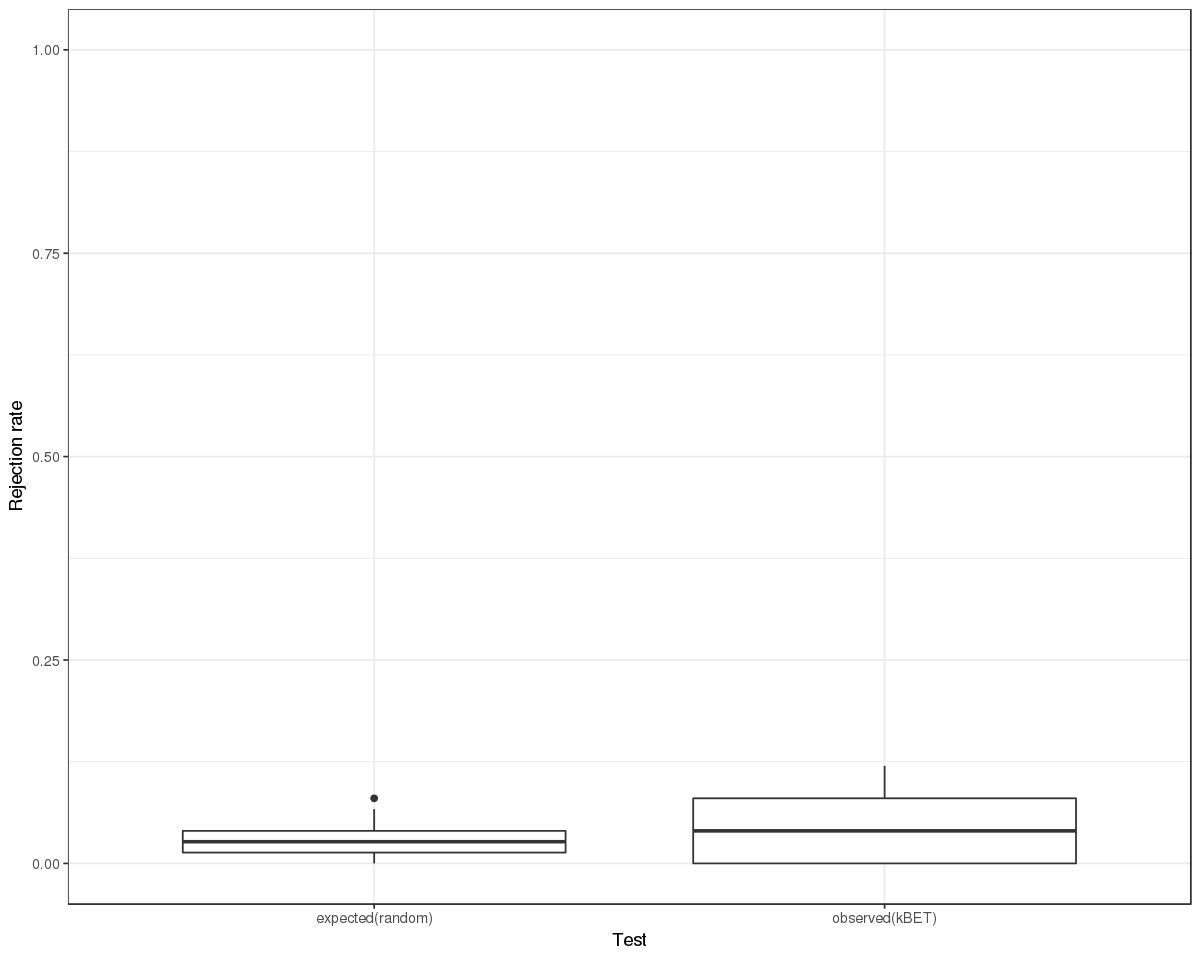

In [253]:
kBET(data,batch)

In [255]:
plot.data

class,data
observed,0.08
observed,0.04
observed,0.00
observed,0.00
observed,0.00
observed,0.08
observed,0.04
observed,0.00
observed,0.08
observed,0.12


In [238]:
(p.val.test)

[1] 0.27570894 0.19516313 0.50093445 0.77276028 0.50093445 0.77276028
 [7] 0.50093445 0.63711941 0.88813659 0.37813806 0.63711941 0.37813806
[13] 0.37813806 0.96429497 0.13468639 0.50093445 0.02519290 0.63711941
[19] 0.03924376 0.63711941 0.00380429 0.27570894 0.88813659 0.77276028
[25] 0.63711941

In [216]:
n_repeat=100
kBET.expected <- numeric(n_repeat)
kBET.observed <- numeric(n_repeat)
kBET.signif <- numeric(n_repeat)

In [227]:
rejection$summary$kBET.expected <-  c(mean(kBET.expected) ,
                                            quantile(kBET.expected, CI95))
rownames(rejection$summary) <- c('mean', '2.5%', '50%', '97.5%')
rejection$summary$kBET.observed <-  c(mean(kBET.observed) ,
                                            quantile(kBET.observed, CI95))
rejection$summary$kBET.signif <- c(mean(kBET.signif) ,
                                         quantile(kBET.signif, CI95))
rejection$summary$lrt.expected <-  c(mean(lrt.expected) ,
                                           quantile(lrt.expected, CI95))
rejection

ERROR: Error in mean(lrt.expected): object 'lrt.expected' not found


In [222]:
CI95 <- c(0.025,0.5,0.975)

In [ ]:
env <- as.vector(cbind(knn$nn.index[, seq_len(k0 - 1)], seq_len(dim.dataset[1])))

In [77]:
tic <- proc.time()
tic

     user    system   elapsed 
   22.018     0.887 41635.971 

In [83]:
testSize <- ceiling(dim.dataset[1]*0.1)

In [84]:
if (testSize < 25 && dim.dataset[1] > 25) {
      testSize <- 25
}

In [87]:
cat(paste0('a','b'))

ab

In [99]:
outsider <- which(!seq_len(dim.dataset[1]) %in% knn$nn.index[, seq_len(k0 - 1)])

In [100]:
is.imbalanced <- FALSE

In [101]:
p.out <- 1

In [103]:
chi_batch_test <- function(knn.set, class.freq, batch, df) {
  #knn.set: indices of nearest neighbours
  #empirical frequencies in nn-environment (sample 1)
  freq.env <- table(batch[knn.set])
  full.classes <- rep(0, length(class.freq$class))
  full.classes[ class.freq$class %in% names(freq.env)] <- freq.env
  exp.freqs <- class.freq$freq*length(knn.set)
  #compute chi-square test statistics
  chi.sq.value <- sum((full.classes - exp.freqs)^2/exp.freqs)
  result <- 1 - pchisq(chi.sq.value, df) #p-value for the result
  if (is.na(result)) { #I actually would like to now when 'NA' arises.
    0
  } else {
    result
  }
}

In [105]:
p.out <- chi_batch_test(outsider, class.frequency, batch,  dof)

In [110]:
is.imbalanced <- p.out < 0.05

In [120]:
length(batch)

[1] 200

In [142]:
round(length(outsider) / length(batch) * 100, 3)

[1] 1

# start

## preliminaries

In [30]:
dof <- length(unique(batch)) -1

In [32]:
frequencies <- table(batch)/length(batch)

In [48]:
typeof(frequencies)

[1] "double"

In [132]:
create_testset_multibatch <- function(n.genes=1000,
                                      n.batch=3,
                                      plattform = c('C1', 'dropseq', 'any'))
{

  #let us simulate several plattforms:
  #C1 - 96 cells (max)
  #dropseq - 3000 cells (max)
  #any - 500 cells (max)
  #we vary the amount of cells per batch to simulate
  #the variance from the QC

  #preliminary initialisations:
  mu <- rbeta(n.genes - 1, 2,5) * 100
  mu <- c(mean(mu), mu)
  b0 <- -1.5

  cells <- data.frame(plattform = c('C1', 'dropseq', 'any'),
                      batch.size = c(96, 1500, 300))
  #get sample size per batch
  samples <- rbeta(n.batch,8,2)*cells$batch.size[cells$plattform == plattform]

  #simulate means of the all batches
  #we choose the variability between batches with the beta distribution.
  #Expected value= a/(a+b)= 1/10 here.
  mu.batch <- sapply(floor(n.genes * rbeta(n.batch, 1,9)),
                     function(x, mu) c(rgamma(x,1), rep(1, n.genes - x)) * mu,
                     mu)
  #model drop-out rate as logistic model
  decay.prob2 <- apply(mu.batch, 2, function(mu, b0) {
    b1 <- 1 / quantile(mu, 0.5)
    res <- 1 / (1 + exp(-(b0 + b1 * mu)))
  }, b0)

  #simulate counts in all batches
  testset <- sapply(seq_len(n.genes), function(k, sample.size, decay.prob, mu) {
    unlist(sapply(seq_len(n.batch), function(x, sample.size, decay.prob, mu) {
      MASS::rnegbin(sample.size[x], mu = mu[k,x], 1) * rbinom(sample.size[x], 1, decay.prob[k,x])
    }, sample.size, decay.prob, mu))
  }, samples, decay.prob2, mu.batch)

  result <- list()

  result$data <- testset #rows: cells, columns: 'genes'
  result$batch <- unlist(sapply(seq_len(n.batch),
                                function(x,y) rep(x, y[x]),
                                samples))
  result$comment <- paste0('testSet_multibatch_', n.genes,
                           'genes_', n.batch,
                           'batches_', plattform)

  result
}

In [137]:
rbeta(1000 - 1, 2,5) * 100

[1]  7.355674 16.064431 10.893155 22.275222 14.296657 27.547559 36.493441
  [8] 22.788094 23.070171 20.036747 52.900567  8.041216 30.152747 34.610961
 [15] 89.409728  8.001443 37.141658 11.373359  5.938352 21.177667 24.004502
 [22] 51.564029 44.464324 19.992331 13.620625 22.718297 54.157029 19.867941
 [29] 46.064060 18.726909 60.878382 49.374242  9.795374 24.053724 16.342857
 [36] 16.037646 17.420301 10.964928 29.635545 19.628141 31.000082  7.280708
 [43] 31.987978 44.840568 44.504708 28.887711 18.544465 41.770075 13.901855
 [50] 45.225567 59.988894 28.499182 28.685586 18.454980 68.837956 10.082227
 [57] 60.807911 33.028711 46.571442 33.690613 55.042048 46.084304 33.648792
 [64]  6.223685 41.583031 32.514485 29.083316 20.205780 43.370783 46.463675
 [71] 37.968421 66.999082 43.523901 15.243663 10.575230 50.868726 30.969879
 [78] 32.777662 26.364779 44.105389 18.796192  2.453252 14.498677 29.110123
 [85] 22.628163 46.114087 73.253171 18.163031 49.827443 16.767362 23.978679
 [92] 19.110968  5.117296 30.501854  8.154016 50.892604 32.549891  5.611360
 [99] 42.394645 25.062701 23.794189 16.793940 29.170476 46.068588 40.681572
[106] 40.585132 51.246460 25.816210 25.333616 22.648817  2.580823 28.829060
[113] 25.689918 51.218707  8.928826 52.281885 23.769964 32.829589 11.278627
[120] 31.591837  6.322610 44.390670 31.283204 20.599394  3.476083 22.493644
[127] 13.367256 24.169529 43.651299 22.083756 55.108802 15.565526 43.323325
[134] 46.061752 62.600104 31.750820 11.210615 18.637671 29.457426 26.706013
[141] 44.208969 13.989147 47.268956 20.966219 23.810413 22.130445 28.414927
[148] 11.447644 11.741182  6.973431  3.744382 44.097674  4.810646 29.675950
[155] 65.816725 17.025789 33.496783 61.845833 38.775640 13.426118 30.593663
[162] 17.609757 14.177901 21.466983 14.024304 16.141802 36.003300 12.572416
[169] 17.051806 23.540974 31.024505 39.494116 51.596984 17.094890  6.001116
[176] 18.367861 38.876811  3.868716 31.947104 77.095807 13.069251 23.026037
[183]  7.053724 42.828153 28.346413 55.940773  6.400041 38.957465 34.916964
[190] 14.420071 20.773473 18.456272 34.512032 58.047705 54.558950 33.475403
[197]  2.850789 30.984328 43.060991 33.324936 20.251115 21.733735 30.625832
[204] 21.544244  9.338775 19.117817 61.128027 17.328216 46.898154 30.958684
[211] 46.213030 35.493503 11.594488 13.579630  7.968770 33.012404 22.487786
[218] 13.404849 32.098896 29.866115  4.646945  8.707855 15.521273 22.891881
[225] 28.185027 20.521189 62.421279 41.693072 17.797816 18.013051 36.501107
[232] 15.926473 30.795499 16.192610  9.279706 56.546458 21.836905 30.966902
[239] 31.882126 75.103820 21.460027 43.345530 29.300411 21.186075 35.934207
[246] 60.476678 15.076911 80.019852 35.428313 56.066585 18.731949 15.974101
[253] 24.752667 43.975948 34.561642 24.144738 22.197430  9.435315 63.389326
[260] 42.754785 35.611640 36.268958 34.626773 10.705269 11.166958 52.871397
[267] 23.401519 19.459539 19.769844 46.752706 12.083611 10.915319 17.911572
[274] 31.146315 28.590229 34.862345 46.788012 51.551605 48.258660  9.128675
[281]  6.299522 44.388326 13.593703 32.528155 30.973183 26.314130 20.548738
[288] 12.060124 48.517792 50.559930  8.603825 46.247804 22.527765 24.800205
[295] 17.179801 17.804173 34.255645 30.114808 49.598446 16.135569 53.144520
[302] 48.994028 32.867213 21.147605 23.934020 14.989530 56.596772 39.248203
[309] 14.595936 23.548263 31.189639 22.627269 38.260542 25.412569  4.277596
[316] 21.151405 22.834831 12.240494 77.154675 36.134480  7.382875 12.158374
[323] 17.575836 30.728754 47.694222 69.234614  3.028715  4.820423 44.300222
[330]  3.644037 30.312179 55.869743 46.584461 33.449784 16.168438 54.026593
[337] 29.222430 49.339248 37.327970 15.066399 23.642096 19.753257 31.501374
[344] 37.174208  7.135008 38.919465  8.917313  5.735498 37.863120 33.482463
[351] 25.625729 25.878071 51.730170 25.119537 21.995151 28.829973 16.253228
[358] 18.153211 28.253552  7.616022 38.945824 50.322561  4.207658 38.978711
[365] 48.492396 16.095493  7.886908  7.518499  4.6

In [140]:
% pdb

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: % pdb
    ^


In [257]:
dim(create_testset_multibatch()$data)

[1] 1555 1000

In [262]:
n.genes=1000

In [263]:
mu <- rbeta(n.genes - 1, 2,5) * 100

In [265]:
mu <- c(mean(mu), mu)

In [266]:
b0 <- -1.5

In [267]:
cells <- data.frame(plattform = c('C1', 'dropseq', 'any'),
                      batch.size = c(96, 1500, 300))
cells

plattform,batch.size
C1,96
dropseq,1500
any,300


In [269]:
n.batch = 3
plattform = c('C1', 'dropseq', 'any')

In [272]:
samples <- rbeta(n.batch,8,2)*cells$batch.size[cells$plattform == plattform]
samples

[1]  89.00676 733.38444 162.49379

In [276]:
mu.batch <- sapply(floor(n.genes * rbeta(n.batch, 1,9)),
                 function(x, mu) c(rgamma(x,1), rep(1, n.genes - x)) * mu,
                 mu)

# function

In [29]:
dof <- length(unique(batch)) - 1 
dof

[1] 9

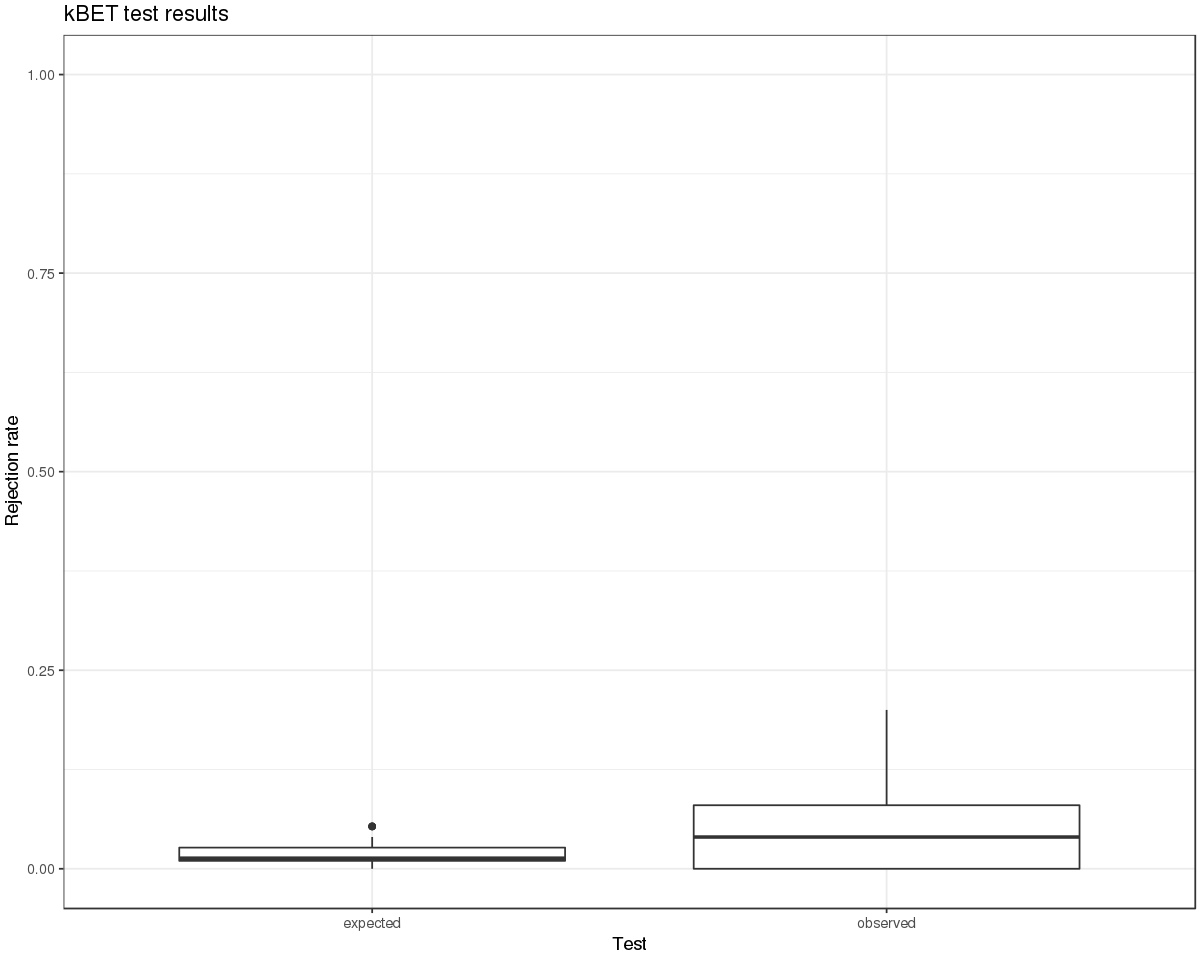

In [129]:
library(ggplot2)
batch.estimate <- kBET(data, batch, plot=FALSE)
plot.data <- data.frame(class=rep(c('observed', 'expected'), 
                                  each=length(batch.estimate$stats$kBET.observed)), 
                        data =  c(batch.estimate$stats$kBET.observed,
                                  batch.estimate$stats$kBET.expected))
library(repr)
options(repr.plot.width=10, repr.plot.height=8)
ggplot(plot.data, aes(class, data)) + geom_boxplot() + 
     labs(x='Test', y='Rejection rate',title='kBET test results') +
     theme_bw() +  
     scale_y_continuous(limits=c(0,1))+
     theme(plot.margin = margin(0.1,0.1,0.1,0.1, "cm"))